In [66]:
import numpy as np
import torch
import csv
import enum
import cv2
from pathlib import Path
from tqdm import tqdm_notebook as tqdm

from matplotlib import pyplot as plt

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim

class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.layer_conv1(x)))
        x = self.pool(F.relu(self.layer_conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        return x

# Initialize model
model = TheModelClass()

# Initialize optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())
print()
# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([10, 400])
fc1.bias 	 torch.Size([10])

Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.001, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [140076825549848, 140076825546968, 140076825549200, 140076825547328, 140076825549992, 140076825547904]}]


In [58]:
for param in model.parameters():
    param.requires_grad = False
for param in model.fc1.parameters():
    param.requires_grad = True

In [60]:
for name, child in model.named_children():
    print(name, child)

conv1 Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
pool MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
conv2 Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
fc1 Linear(in_features=400, out_features=10, bias=True)


In [19]:
folder_path = Path('/home/tony/datasets/Mango/')
# csv_path = folder_path / Path('train.csv')
csv_path = folder_path / Path('dev.csv')
data_paths = []

class_type = {}
class_type['A'] = 0
class_type['B'] = 1
class_type['C'] = 2

label_cnt = [0, 0, 0]

max_h, max_w = 0, 0
min_h, min_w = 9999, 9999
with open(csv_path, "r") as f:
    rows = csv.reader(f)
    for i, row in tqdm(enumerate(rows)):
        if i == 0:
            continue
        num_img, label = row
        img_path = str(folder_path / Path('traindev') / Path(num_img))
    
        label_cnt[class_type[label]] += 1
        img = cv2.imread(img_path)
        if img.shape[0] > max_h:
            max_h = img.shape[0]
        if img.shape[1] > max_w:
            max_w = img.shape[1]
        if img.shape[0] < min_h:
            min_h = img.shape[0]
        if img.shape[1] < min_w:
            min_w = img.shape[1]
        
        data_paths.append((img_path, class_type[label]))
        
print(label_cnt)


[243, 293, 264]


In [6]:
def bgr2rgb(img_bgr):
    return np.concatenate((img_bgr[:, :, 2:], img_bgr[:, :, 1:2], img_bgr[:, :, 0:1]), axis=2) 

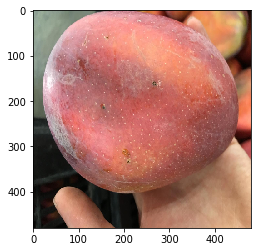

In [15]:
img_bgr = cv2.imread(data_paths[3][0])
img_bgr = cv2.resize(img_bgr, (480, 480), interpolation=cv2.INTER_CUBIC)
plt.imshow(bgr2rgb(img_bgr))

In [ ]:
def loadData(filename):
    fr = open(filename)
    lines = fr.readlines()
    dataset = np.zeros((len(lines),256))
    index = 0
    for line in lines:  
        line = line.strip().split(' ')
        dataset[index] = list(line)[1:] 
        index += 1
    return dataset

train_data = loadData('home')

In [ ]:
def tanh(self,s):
    return (np.exp(s)-np.exp(-s)) / (np.exp(s)+np.exp(-s))

def tanh_deriv(self,s):
    return 1 - self.tanh(s)**2